# Image Processing EDA

## Basic Stats

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import numpy as np

In [2]:

index_df = pd.read_csv('../../data/image_index_dtl.csv')

In [3]:
index_df

,img,data_set,condition,image_tensor,channels,height,width,data_set_name
0,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0,"[1, 1317, 1857]",1,1317,1857,test
1,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0,"[1, 1509, 2111]",1,1509,2111,test
2,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0,"[1, 1837, 2031]",1,1837,2031,test
3,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0,"[1, 1326, 1663]",1,1326,1663,test
4,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0,"[1, 1818, 2053]",1,1818,2053,test
...,...,...,...,...,...,...,...,...
5851,..\..\data\extracted\chest_xray\val\PNEUMONIA\...,2,1,"[1, 944, 1416]",1,944,1416,validation
5852,..\..\data\extracted\chest_xray\val\PNEUMONIA\...,2,1,"[1, 864, 1256]",1,864,1256,validation
5853,..\..\data\extracted\chest_xray\val\PNEUMONIA\...,2,1,"[1, 656, 1016]",1,656,1016,validation
5854,..\..\data\extracted\chest_xray\val\PNEUMONIA\...,2,1,"[1, 952, 1192]",1,952,1192,validation


In [4]:
index_df.condition.value_counts()

1    4273
0    1583
Name: condition, dtype: int64

In [5]:
index_df.data_set_name.value_counts()

train         5216
test           624
validation      16
Name: data_set_name, dtype: int64

In [6]:
index_df.describe()

,data_set,condition,channels,height,width
count,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000
mean,0.896175,0.729679,1.096653,970.689037,1327.880806
std,0.313890,0.444164,0.428947,383.392117,363.500922
min,0.000000,0.000000,1.000000,127.000000,384.000000
25%,1.000000,0.000000,1.000000,688.000000,1056.000000
50%,1.000000,1.000000,1.000000,888.000000,1281.000000
75%,1.000000,1.000000,1.000000,1187.000000,1560.000000
max,2.000000,1.000000,3.000000,2713.000000,2916.000000


/Users/danielvalenzuela/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  from ipykernel import kernelapp as app


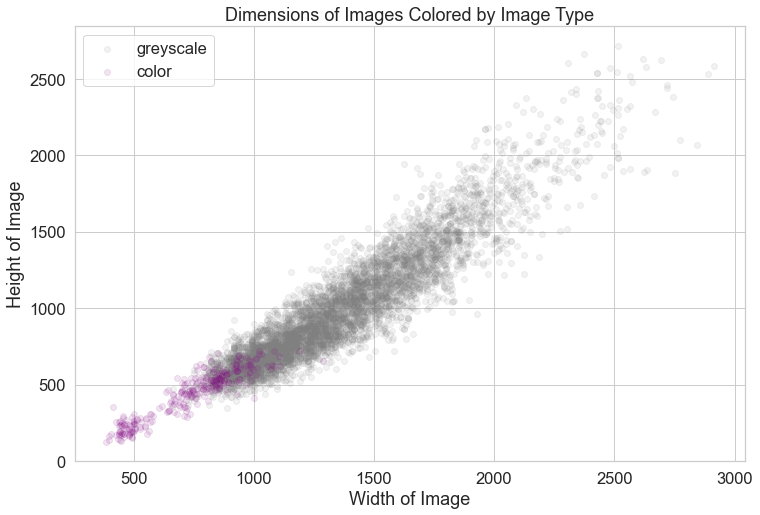

In [34]:
fontscale = 1.5
sns.set(font_scale=fontscale, style='whitegrid')
figsize = (12,8)

def channelScatter(index_df):
    grey_img = index_df[index_df.channels == 1]
    color_img = index_df[index_df.channels == 3]

    fig, ax = plt.subplots(figsize = figsize)

    ax.scatter(x=grey_img.width, y=grey_img.height, label="greyscale", color="grey", alpha = 0.1)
    ax.scatter(x=color_img.width, y=color_img.height, label="color", color="purple", alpha = 0.1)
    ax.set(xlabel = "Width of Image",
           ylabel = "Height of Image",
           Title = "Dimensions of Images Colored by Image Type"
          )

    plt.legend()
    
    plt.savefig("../../images/image_colors.png")
    return plt.show()
    
channelScatter(index_df)

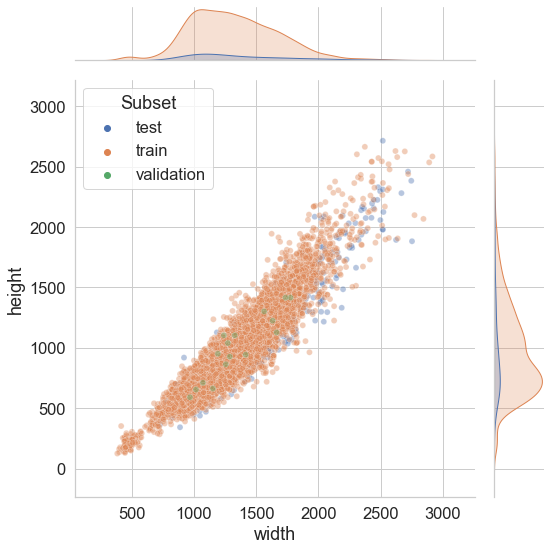

In [107]:
jointplot = sns.jointplot(data=index_df, 
                           x="width", 
                           y="height", 
                           hue="data_set_name", 
                           kind="scatter",
                           height = figsize[1],
                           ratio = round(figsize[0]/figsize[1]+5),
                           alpha=0.4)


jointplot.ax_joint.legend(title="Subset")
plt.tight_layout()
plt.savefig("../../images/image_pix_dist.png")



In [67]:
colors.shape

(3, 4)

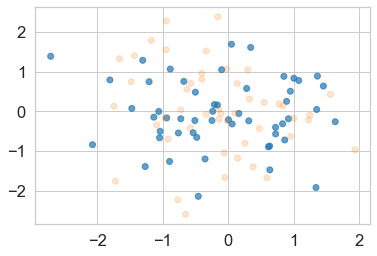

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

df = pd.DataFrame(np.random.randn(100,2), columns=list("AB"))
df["hue"] = np.random.randint(0,2, size=100)


colors = [(0.1215, 0.4667, 0.7059, 0.7), 
          (1.0000, 0.4980, 0.0550, 0.2)]
cmap = ListedColormap(colors)

plt.scatter(x="A", y="B", c="hue", data=df, cmap=cmap)

## Creating function to get correct crop percentages

In [9]:
def crop1to1(img_tensor):
    """
    Given an image tensor  of (channel, width, height) this will provide crop percentages
    to get to a 1:1 aspect ratio.
    
    Parameters
    -------------
        img_tensor (tuple): (channel, width, height) of an image
        
    Returns
    -------------
        cropPct (tuple): (x_percent, y_percent) crop of image to get to 1:1 aspect
                            ratio
    """
    
    # retrieving relevant info from img_tensor
    x = img_tensor[1]
    y = img_tensor[2]
    
    # calculate crop to 1:1 ratio based on smallest dimension
    if x >= y:
        x_percent = y/x
        y_percent = 1
    else:
        y_percent = x/y
        x_percent = 1
        
    cropPct = (x_percent, y_percent)
    
    return cropPct
        

### testing function

In [10]:
img_tensor = (1, 600, 780)
crop1to1(img_tensor)

(1, 0.7692307692307693)